In [11]:
import numpy as np
import pandas as pd
import requests
import IPython.display as Disp

#### Utils

In [10]:
def printList(arr):
    print("DP ARRAY",*arr, sep="\n")

## Arrays

#### Pascals Triangle

In [54]:
def pascals_triangle(N):
    arr = []
    for i in range(1,N+1):
        arr.append([1]*i)
        if i>2:
            for j in range(1,i-1):
                arr[-1][j] = arr[-2][j] + arr[-2][j-1]
                
    return arr


In [55]:
printList(pascals_triangle(5))

DP ARRAY
[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]


#### Dutch National Flag / Sort 0,1,2

In [101]:
def DNF(arr):
    '''
    lo, cur, hi <- cur iterates and swaps...
    0s in between : 0<->lo
    2s in between : hi<->N
    1s get auto-filles betwwen lo<->hi
    At any points.. i<lo : 0s filled, i>hi : 2s filled
    '''

    lo = cur = 0
    hi = len(arr)-1

    while cur <= hi: # mid>hi, stop(everything after hi is already 2)
        if arr[cur] == 0:
            arr[lo],arr[cur] = arr[cur], arr[lo]
            lo += 1
            cur += 1
        elif arr[cur] == 2:
            arr[cur],arr[hi] = arr[hi], arr[cur]
            hi -= 1
        else:
            cur += 1
    return arr


In [103]:
arr = [0,2,1,2,1,0,0,0,0,2]
print(DNF(arr))

[0, 0, 0, 0, 0, 1, 1, 2, 2, 2]


#### Kadanes Algorithm / Maximum Subarray

In [6]:
def kadanes(arr):
    n = len(arr)
    res = arr[0]
    c_sum = 0

    for cur in arr:
        c_sum += cur
        res = max(res, c_sum)    
        if c_sum < 0:
            c_sum = 0
    return res

In [7]:
nums = [-2,1,-3,4,-1,2,1,-5,4] # res  = 6
kadanes(nums)

6

#### POW(X,n)

In [8]:
def power(x,n):
    res = 1
    base = x

    while n>0:
        if n%2 == 0: # even power
            n = n//2
            base = base ** 2
        else:   # odd power
            res = res * base
            n = n-1
    return res

In [12]:
power(2,15)

32768

#### Find the Duplicate Number in N+1

https://leetcode.com/problems/find-the-duplicate-number/

In [17]:
def findDuplicate(nums):
    res = 0
    for i,x in enumerate(nums):
        if i>0:
            res = res^i
        res = res^x
    return res

In [18]:
findDuplicate([1,2,3,4,4])

4

#### Longest Subarray with 0 sum

https://bit.ly/31UHoeM <br>
https://practice.geeksforgeeks.org/problems/largest-subarray-with-0-sum/1

#### Squares of sorted array

https://leetcode.com/problems/squares-of-a-sorted-array/

In [30]:
def squares_sorted_array(arr):
        n = len(arr)

        start = 0
        end = n-1
        res_index = n-1 # in each step you compare the extremes -> take the max one and out it in the last index and dccrement that index
        res = [0]*n

        while start <= end: 
            if arr[start]**2 > arr[end]**2: # You picked the first element as max
                res[res_index] = arr[start]**2
                start += 1
            else: # you picked the last element as max
                res[res_index]  = arr[end]**2
                end -=1 
            
            res_index -=1 


        return res

In [31]:
arr = [-10,-3,1,2,4]
squares_sorted_array(arr)

[1, 4, 9, 16, 100]

#### Rotate Array

In [59]:
def reverse_array(arr, start=None, end=None):
    n = len(arr)
    lo = start if start else 0
    hi = end-1 if end else n-1
    while lo < hi:
        arr[lo], arr[hi] = arr[hi], arr[lo]
        lo += 1
        hi -= 1
    return arr

def rotate_array(arr, k):
    n = len(arr)
    k = k%n # if k>n
    res = reverse_array(arr[:n-k]) + reverse_array(arr[k+1:])
    return reverse_array(res)


In [60]:
arr = [1,2,3,4,5,6,7]
k =3 

rotate_array(arr, k)


[5, 6, 7, 1, 2, 3, 4]

#### Move Zeros

Move all zeros to end -> Can you do it in INPLACE + O(N) TC and O(1) SC

In [62]:
def move_zeros(arr):
    n = len(arr)
    zero_ptr = 0

    for i in range(n):
        if arr[i] != 0:
            arr[i], arr[zero_ptr] = arr[zero_ptr], arr[i]
            zero_ptr += 1
    
    for i in range(zero_ptr,n):
        arr[i] = 0

    return arr

In [64]:
arr = [0,1,0,2,4,67]
print(move_zeros(arr))
arr = [4,1,0,2,0,10]
print(move_zeros(arr))

[1, 2, 4, 67, 0, 0]
[4, 1, 2, 10, 0, 0]


#### Two Sum in sorted array

https://leetcode.com/problems/two-sum-ii-input-array-is-sorted/

In [67]:
def two_sum_sorted(arr, target):
    n = len(arr)
    lo = 0 
    hi = n-1

    while lo<hi:
        cSum = arr[lo]+arr[hi]

        if cSum == target:
            return lo,hi
        elif cSum > target:
            hi -= 1
        else:
            lo += 1
    return -1,-1

In [68]:
arr = [2,7,11,15]
two_sum_sorted(arr, 9)

(0, 1)

#### Flood Fill

Given a new color, fill all pixeks connected with same color [4 way directions]

In [11]:
class FF:
    def __init__(self, arr, i, j, fill_color):
        self.arr = arr
        self.nr = len(arr)
        self.nc = len(arr[0])
        self.vis = [[False for _ in range(self.nc)] for _ in range(self.nr)]
        
        self.flood_fill(i, j, arr[i][j], fill_color)
        printList(self.arr)
    
    def isValid(self, i, j):
        return i>=0 and i<self.nr and j>=0 and j<self.nc   

    def flood_fill(self, i,j,old_color, new_color):
        if self.isValid(i,j) and not self.vis[i][j] and self.arr[i][j] == old_color:
            self.arr[i][j] = new_color
            self.vis[i][j] = True
        
            # Explore all four directions
            self.flood_fill(i+1,j,old_color, new_color)
            self.flood_fill(i-1,j,old_color, new_color)
            self.flood_fill(i,j+1,old_color, new_color)
            self.flood_fill(i,j-1,old_color, new_color)
            

In [13]:
arr = [
    [1,1,1],
    [1,1,0],
    [1,0,1]
]

arr = [[0,0,0],[0,1,1]]

FF(arr, 1,1,1)

DP ARRAY
[0, 0, 0]
[0, 1, 1]


## Dynamic Programming


https://leetcode.com/discuss/general-discussion/458695/dynamic-programming-patterns

#### Subset Sum Problem

Given an array check if subset sum = target (Subset doesnt need to be in order) <br>
-> Also count how many ways it can be done <br>
-> Assumption : ONLY POSITIVE ELEMENTS

In [133]:
def subset_sum(arr, n, target): # start n-1 : last index (dont have to store len explicitly)
    if target == 0:
        return 1    
    if n==0: # exhausted all elements till now
        return 0

 
    if arr[n-1] > target:
        return subset_sum(arr, n-1, target)

    return subset_sum(arr, n-1, target) + subset_sum(arr, n-1, target -arr[n-1])

def dp_subset_sum(arr, target):
    n = len(arr)

    dp = [[0 for x in range(target+1)] for x in range(n+1)]

    for i in range(n+1): # number of elements left
        for j in range(target+1): # target sum left
            if j==0:
                dp[i][j] = 1
            elif i==0:
                dp[i][j] = 0
            elif arr[i-1] > j:
                dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = dp[i-1][j] + dp[i-1][j-arr[i-1]]

    # printList(dp)
    return dp[n][target] 
            
            
    

In [135]:
arr = [3, 34, 4, 12, 5, 2] # ANS=2
target = 9

print(subset_sum(arr, len(arr), target))
print(dp_subset_sum(arr, target))

2
2


#### Partition into 2 subsets with given difference

- All elements must belong one of the 2 partitioned subsets
- Print true or false (done or cant be done)
- arr = [1, 1, 2, 3], diff = [1] <br>
    True [1,1,3] and [2,3]

In [44]:
def get_partition_sums(arr, diff):
    csum = sum(arr)
    s1 = (csum+diff)/2

    return s1, abs(csum-s1)

def check_if_int(n):
    return int(n) == n


In [51]:
def can_partition_with_diff(arr, diff):
    s1, s2 = get_partition_sums(arr, diff)
    print(s1, s2)

    if not check_if_int(s1):
        return False

    n = len(arr)
    countSubsets = dp_subset_sum(arr, int(s1))
    
    return True if countSubsets>0 else False

In [54]:
arr = [1,1,2,3]
diff = 1

can_partition_with_diff(arr, diff)


4.0 3.0


True

#### Knapsack - Bounded (0-1 Knapsack)

Given Weights and costs of items, and max_capacity of bag <br>
Task : You can either pick/not pick an item <br>
<br>
Give the items you will pick which give max/min cost and also fit in the max_capacity

In [5]:
def bounded_knapsack(arr, weights, W, n ):
    if n==0 or W==0:
        return 0

    if weights[n-1] > W: #dont pick
        return bounded_knapsack(arr, weights, W, n-1)

    return max(
        arr[n-1] + bounded_knapsack(arr, weights, W-weights[n-1], n-1),
        bounded_knapsack(arr, weights, W, n-1)
    )
    


In [15]:
def dp_bounded_knapsack(arr, weights, W):
    n = len(arr)
    dp = [[0 for _ in range(W+1)] for _ in range(n+1)]

    for i in range(n+1): # current element  index
        for j in range(W+1): # cur max_capacity remaining
            if j==0 or i==0:
                dp[i][j] = 0
            elif weights[i-1] > j: # dont pick current ele
                dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = max(arr[i-1] + dp[i-1][j-weights[i-1]], dp[i-1][j-1])
    
    # printList(dp)
    return dp[n][W]

In [46]:
weights = [10, 20, 30]
costs = [60, 100, 120]
capacity = 50 
# RESULT = 220 pick 20+30 = 50, total = 100+120

print(bounded_knapsack(costs, weights, capacity, len(costs)))
print(dp_bounded_knapsack(costs, weights, capacity))

220
220


#### Target Sum 

You want to build an expression out of nums by adding one of the symbols '+' and '-' before each integer in nums and then concatenate all the integers.

For example, if nums = [2, 1], you can add a '+' before 2 and a '-' before 1 and concatenate them to build the expression "+2-1".

**Task** : Return the number of different expressions that you can build, which evaluates to target <br>
**Solution** : https://leetcode.com/problems/target-sum/discuss/455024/DP-IS-EASY!-5-Steps-to-Think-Through-DP-Questions.

In [61]:
class Solution:
    dp = {}

    def target_sum(self, arr, n, cur_sum):
        if (n,cur_sum) in self.dp:
            return self.dp[(n,cur_sum)]

        if n==0:
            return 1 if cur_sum==0 else 0
        cur_ele = arr[n-1]
        res = self.target_sum(arr, n-1, cur_sum-cur_ele) + self.target_sum(arr,n-1, cur_sum+cur_ele)

        self.dp[(n,cur_sum)] = res
        return res
    


In [62]:
nums = [1,1,1,1,1]
target = 3
# result = 5 (5 ways to assign +/- to nums to get answer as 3)
 
print(Solution().target_sum(nums, len(nums), target))

nums = [0,0,0,0,0,0,0,0,1]
target = 1

print(Solution().target_sum(nums, len(nums), target))


5
192


#### Climbing Stairs

You can climb 1 or steps at time. <br>
Given there are `n` stairs, in how many ways can you reach `nth` stair starting from base

In [2]:
def climbStairs(n):
    if n<2:
            return 1
            
    dp = [0 for _ in range(n+1)]
    dp[0] = 1
    dp[1] = 1

    for i in range(2,n+1):
        dp[i] = dp[i-1]+dp[i-2]
    return dp[i]

In [5]:
climbStairs(3)

3

#### Frog Jump - Easy

https://www.codingninjas.com/codestudio/problems/frog-jump_3621012?source=youtube&campaign=striver_dp_videos&utm_source=youtube&utm_medium=affiliate&utm_campaign=striver_dp_videos

In [6]:
def frogJump(n: int, arr):
    dp = [0 for _ in range(n+1)]
    dp[0] = 0
    dp[1] = abs(arr[1]-arr[0])
    for i in range(2,n):
        dp[i] = min(dp[i-1]+abs(arr[i]-arr[i-1]), dp[i-2]+abs(arr[i]-arr[i-2]))     
    return dp[n-1]


In [8]:
frogJump(4, [10,20,30,10])

20

#### Maximum Sum of non adjancent elements | House Robber-I

https://www.codingninjas.com/codestudio/problems/maximum-sum-of-non-adjacent-elements_843261 <br>
https://leetcode.com/problems/house-robber/ <br>

You are given an array/list of ‘N’ integers. You are supposed to return the maximum sum of the subsequence 
with the constraint that no two elements are adjacent in the given array/list

In [136]:
def maximumNonAdjacentSum(arr, n):    
    if n<0:
        return 0
    
    if n==0:
        return arr[0]
    
    return max(
        arr[n-1] + maximumNonAdjacentSum(arr,n-2),
        maximumNonAdjacentSum(arr, n-1)
    )

In [171]:
def dp_maximumNonAdjacentSum(arr,n=None):
    n = len(arr)
    if n == 1:
        return arr[0]
    dp = [0 for _ in range(n)]

    # at 0 u can only pick a[0]
    # at 1 you 2 options -> pick a[1] or a[0] as if cant pick both
    dp[0] = arr[0]
    dp[1] = max(arr[1], arr[0]) # this is not needed in recursive -> f(-ve index) will return as 0, in case of tabular index cant be negative

    for i in range(2,n):
        dp[i] = max(dp[i-1], arr[i]+dp[i-2])
        
    return dp[n-1]


In [172]:
arr = [1,2,3,5,4] # res=9
print(dp_maximumNonAdjacentSum(arr, len(arr)))

arr = [1,2,3,1,3,5,8,1,9]
print(dp_maximumNonAdjacentSum(arr, len(arr)))

arr = [8,8]
print(dp_maximumNonAdjacentSum(arr))
maximumNonAdjacentSum(arr, len(arr)-1)

8
24
8


8

#### House Robber II


https://leetcode.com/problems/house-robber-ii/ <br>
Maximize sum by picking Non-adjacent elements but first and last element are considered to be adjacent <br>
Added Logic : You cant consider arr[0] and arr[-1] <br><br>
**Solution**<br><br>
U cant pick first and last, so in our solution we are sure that both cant be considered <br>
**max(** maximumNonAdjacentSum(arr[first:]), maximumNonAdjacentSum(arr[:last]) **)**

In [176]:
def houses_2(arr):
    n = len(arr)
    return max(
        dp_maximumNonAdjacentSum(arr[1:]),
        dp_maximumNonAdjacentSum(arr[:-1])
    )

In [177]:
nums = [1,2,3,1]
print(houses_2(nums))

nums = [2,3,2]
print(houses_2(nums))


4
3


#### Ninja Training <br>

https://www.codingninjas.com/codestudio/problems/ninja-s-training_3621003 <br>

Given `n` days and `k` types of activities you can do each day to earn points. <br>
Give max points you can earn at end of `n` days, but you cant do same acticity consecutively

In [220]:
def ninja_training(arr):
    n = len(arr)
    n_sports = len(arr[0])

    dp = [[0 for _ in range(n_sports)] for _ in range(n)]

    for i in range(n):
        for j in range(n_sports):
            if i==0:
                dp[i][j] = arr[i][j]
            else:
                for k in range(n_sports): # if j=0, then take previous 1 and 2 (n_sports=3)
                    if k == j:
                        continue
                    dp[i][j] = max(dp[i][j], arr[i][j]+dp[i-1][k] )
    
    return max(dp[n-1])


## FOR n_sports=3 ##
#
# if i==0:
#     dp[i][j] = arr[i][j]
# elif j==0:
#     dp[i][j] = arr[i][j] + max(dp[i-1][1], dp[i-1][2])
# elif j==1:
#     dp[i][j] = arr[i][j] + max(dp[i-1][0], dp[i-1][2])
# else:
#     dp[i][j] = arr[i][j] + max(dp[i-1][0], dp[i-1][1]
#

In [221]:
arr = [
    [1,2,5],
    [3,1,1],
    [3,3,3]
]
# EXPECTED RES = 11
print(ninja_training(arr))

arr = [
    [10,40,70],
    [20,50,80],
    [30,60,90]
]
# EXPECTED RES = 210
print(ninja_training(arr))

arr = [[18,11,19],[4,13,7],[1,8,13]]
print(ninja_training(arr)) # 45

arr = [[10,50,1],[5,100,11]]
print(ninja_training(arr)) # 110

11
210
45
110


#### Unique Paths

In [6]:
def uniquePaths( m: int, n: int) -> int:
    grid = [[0 for _ in range(n)] for _ in range(m)]
    
    for i in range(m):
        for j in range(n):
            if i==0 and j==0:
                grid[i][j] = 1
            elif i==0 or j==0: # you are on top row or left most row(you can reach 0,0 in only 1 way i.e move all left/up)
                grid[i][j] = 1
            else:
                grid[i][j] = grid[i-1][j] + grid[i][j-1]
    print(*grid, sep="\n")
    return grid[m-1][n-1]
            
    

In [7]:
uniquePaths(3,7) # RES=28

[1, 1, 1, 1, 1, 1, 1]
[1, 2, 3, 4, 5, 6, 7]
[1, 3, 6, 10, 15, 21, 28]


28

#### Unique Paths II (With Obstacles)

In [13]:

def uniquePathsWithObstacles(obstacleGrid):
    m = len(obstacleGrid)
    n = len(obstacleGrid[0])
    grid = [[0 for _ in range(n)] for _ in range(m)]

        
    if obstacleGrid[0][0]==1 or obstacleGrid[m-1][n-1]==1:
        return 0
    
    for i in range(m):
        for j in range(n):
            if obstacleGrid[i][j] == 1:
                grid[i][j] = 0
            elif i==0 and j==0:
                grid[i][j] = 1
            # elif i==0 or j==0: You cant say you can move all lefts/ups as there may be obstacles in between
            #     grid[i][j] = 1
            else:
                grid[i][j] = grid[i-1][j] + grid[i][j-1]
    return grid[m-1][n-1]


In [17]:
print(uniquePathsWithObstacles([[0,0,0],[0,1,0],[0,0,0]])) # RES = 2

print(uniquePathsWithObstacles([[0,0],[1,1],[0,0]])) # RES=0

2
0


#### Minimum Path Sum

In [18]:

def minPathSum(grid) -> int:
    nr = len(grid)
    nc = len(grid[0])
    
    dp = [[0 for _ in range(nc)] for _ in range(nr)]
    
    for i in range(nr):
        for j in range(nc):
            if i==0 and j==0:
                dp[i][j] = grid[i][j]
            elif j==0: # upward movement is possible
                dp[i][j] = grid[i][j] + dp[i-1][j]
            elif i==0: # only left movement is possible
                dp[i][j] = grid[i][j] + dp[i][j-1]
            else: # both up and left are possible
                dp[i][j] = grid[i][j] + min(dp[i-1][j], dp[i][j-1])
    print(*dp, sep="\n")
    
    return dp[nr-1][nc-1]

In [19]:
arr = [[1,3,1],[1,5,1],[4,2,1]] # res = 7
minPathSum(arr)

[1, 4, 5]
[2, 7, 6]
[6, 8, 7]


7

#### Triangle Min Sum path (Fixed Start, Variable End)

In [26]:
def traingle_minimum_total(triangle) -> int:
    n = len(triangle)
    
    dp = [[0 for _ in range(x+1)] for x in range(n)]
    dp[0][0] = triangle[0][0]
    
    for i in range(1,n):
        prev_row_len = len(dp[i-1])
        for j in range(len(dp[i])):
            prev_res1 = float('inf')
            prev_res2 = float('inf')
            if j >= 0 and j < prev_row_len:
                prev_res1 = dp[i-1][j]
            if j-1 >= 0 and j-1 < prev_row_len:
                prev_res2 = dp[i-1][j-1]
            dp[i][j] = triangle[i][j] + min(prev_res1, prev_res2)
    
    print(*dp, sep="\n")
    return min(dp[-1])
            
            

In [27]:
arr = [[2],[3,4],[6,5,7],[4,1,8,3]] # Res = 11

traingle_minimum_total(arr)

[2]
[5, 6]
[11, 10, 13]
[15, 11, 18, 16]


11

#### Min Falling Path Sum (Variable start,end)


In [30]:
def minFallingPathSum( matrix) -> int:
    n = len(matrix)
    dp = [[0 for _ in range(n)] for _ in range(n)]
    dp[0] = matrix[0]
    
    for i in range(1,n):
        for j in range(n):
            # up direction is gauranteed, but diagonal up-left/right may overflow
            diag1 = float('inf')
            diag2 = float('inf')
            
            if (j-1) >= 0 and (j-1) < n:
                diag1 = dp[i-1][j-1]
            if (j+1) >= 0 and (j+1) < n:
                diag2 = dp[i-1][j+1]
            
            dp[i][j] = matrix[i][j] + min([dp[i-1][j], diag1, diag2])
            
    return min(dp[-1])
    

In [31]:
print(minFallingPathSum([[2,1,3],[6,5,4],[7,8,9]])) # res=13

print(minFallingPathSum([[-48]])) # res = -48

13
-48


## Linked List

In [94]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
    
    def __str__(self):
        return str(self.val)

def printLL(head):
    while head:
        print(head.val,end="->")
        head = head.next
    print()


#### Middle of linkedlist

In [91]:

def middleNode(head):
    slow = head
    fast = head
    
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    
    return slow
        
        

In [93]:
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)

printLL(head)

print(middleNode(head))

1->2->3->4->5->
3


#### Remove Nth node from last

**Logic**
**Solution 1** : find len(LL) -> iterate to N-nth node <br>
**Solution 2** : <br>
INIT slow = head<br>
INIT fast = head -> move fast n times<br>
iterate slow and fast normally (increment by 1)<br>
When fast reaches end -> slow = answer<br><br>

**Logic**
You init `fast` by `n` steps ahead of head, that means `slow` is `n` steps behind `fast` i.e fast-n<br>
Then u increment both. When `fast` reaches end, `slow` will have reached `end-n` since it was lagging by `n` steps when we had started

In [ ]:

def removeNthFromEnd(self, head, n):
    slow = head
    fast = head
    
    
    for _ in range(n):
        fast = fast.next
    
    if not fast: # [1,2,3] n=3 -> fast will be at None, that means slow is already at (N-n)th position
        return head.next
    
    while fast and fast.next:
        slow = slow.next
        fast = fast.next
    
    
    slow.next = slow.next.next
    return head
        

## Searching / Sorting

#### Binary Search

In [222]:
def bin_search(arr, target, start=None, end=None) -> int:
    n = len(arr)
    lo = start if start else 0
    hi = end if end else n-1

    if hi == lo and arr[hi]==target: # IMPORTANT -> [5], [4] 
        return lo

    while lo <= hi: # IMPORTANT -> (use <= if key lies first or last index)
        mid = lo + ((hi-lo)//2)
        if arr[mid] == target:
            return mid
        elif arr[mid] > target:
            hi = mid-1
        else:
            lo = mid+1
    return -1


In [ ]:
arr = [2,5]
bin_search(arr,2)

0

In [ ]:
arr = [1,2,3,40,50,99,100]
bin_search(arr, 100)

6

#### First/Last Occurence in sorted array

In [ ]:
def first_occurence(arr, target):
    n = len(arr)
    lo = 0
    hi = n-1
    firstOcc = -1

    while lo<=hi:
        mid = lo + ((hi-lo)//2)
        if arr[mid]==target: # if same store and move left-side
            firstOcc = mid
            hi = mid-1
        elif arr[mid] > target:
            hi = mid-1
        else:
            lo = mid+1

    return firstOcc


def last_occurence(arr, target):
    n = len(arr)
    lo = 0
    hi = n-1
    lastOcc = -1

    while lo<hi:
        mid = lo + ((hi-lo)//2)
        if arr[mid]==target: # if same store and move right-side
            lastOcc = mid
            lo = mid+1
        elif arr[mid] > target:
            hi = mid-1
        else:
            lo = mid+1

    return lastOcc


In [ ]:
arr = [2,2,2,3,3,3,3,3,3,5,5,5,5]
# arr = [2,2,3,3,3,5,5]
print(first_occurence(arr,2))
print(first_occurence(arr,3))
print(first_occurence(arr,5),"\n")

print(last_occurence(arr,2))
print(last_occurence(arr,3))
print(last_occurence(arr,5))

0
3
9 

2
7
11


#### Find Square root using BinSearch (Given exists)

In [ ]:
def get_square_root(n):
    lo = 0
    hi = n//2

    n_iters = 0

    while lo <= hi:
        n_iters += 1
        mid = lo + ((hi-lo)//2)

        if mid**2 == n:
            print("Iterations: ",n_iters,end=" | -> Answer:")
            return mid
        elif mid**2 > n:
            hi = mid-1
        else:
            lo = mid+1

    
    return -1


In [ ]:
print(get_square_root(144))
print(get_square_root(2500))

Iterations:  4 | -> Answer:12
Iterations:  10 | -> Answer:50


#### Search in Rotate Sorted array


Steps : Find Pivot (Use Binary Search) -> Binary Search on left and right parts (which are already sorted)

Pivot Ele : First element of right sorted array
[4,5,6,1,2,3] pivot = 1

In [9]:
arr = [3,4,5,1,2] # pivot = 5

# get_pivot_index(arr)



#### First Bad Version

[Leetcode Link](https://leetcode.com/problems/first-bad-version)
- If one version is bad all versions following it will be bad
- Suppose you have n versions [1, 2, ..., n] and you want to find out the first bad one, which causes all the following ones to be bad.
- You are given an API bool isBadVersion(version) which returns whether version is bad. Implement a function to find the first bad version. You should minimize the number of calls to the API.

In [1]:

def firstBadVersion(self, n: int) -> int:
    lo = 1
    hi = n
    
    if n == 1:
        return 1
    
    while lo <= hi:
        mid = lo + ((hi-lo)//2) 
        
        if isBadVersion(mid): # if bad -> There may also be bad ones at the left
            if not isBadVersion(mid-1):
                return mid
            hi = mid-1
        else: # if not bad move right 
            lo = mid+1
    

## Graphs

#### Max area of Islands

https://leetcode.com/problems/max-area-of-island/

In [59]:
class NumberIslands:
    def __init__(self, arr):
        self.arr = arr
        self.nr = len(arr)
        self.nc = len(arr[0])
        self.vis = [[False for _ in range(self.nc)] for _ in range(self.nr)]
        
    def get_max_island(self):
        maxLen = 0
        for i in range(self.nr):
            for j in range(self.nc):
                if self.arr[i][j] == 1:
                    islandLen = self.flood_fill(i,j)
                    maxLen = max(maxLen, islandLen)
        return maxLen

    
    def isValid(self, i, j):
        return i>=0 and i<self.nr and j>=0 and j<self.nc   

    def flood_fill(self, i,j, length=0):
        if self.isValid(i,j) and self.arr[i][j]==1:
            self.arr[i][j] = 0
        
            # Explore all four directions
            return 1+ self.flood_fill(i+1,j) + self.flood_fill(i-1,j) +self.flood_fill(i,j+1) + self.flood_fill(i,j-1)
        return 0
            

In [60]:
grid = [
    [0,0,1,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,1,1,0,0,0],
    [0,1,1,0,1,0,0,0,0,0,0,0,0],
    [0,1,0,0,1,1,0,0,1,0,1,0,0],
    [0,1,0,0,1,1,0,0,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,0,1,1,0,0,0,0]
] # SOL = 6

NumberIslands(grid).get_max_island()

6

## Sliding Window

#### Longest Substring Without Repeating Characters

https://leetcode.com/problems/longest-substring-without-repeating-characters/

In [16]:
def remove_from_map_before(hMap, idx):

    for key,val in list(hMap.items()):
        if val <= idx:
            del hMap[key]
    return hMap

def longest_substr(s):
    arr = list(s)
    n = len(arr)
    hashmap = {}
    maxLen = 0

    for idx, x in enumerate(arr):
        if x in hashmap:
            maxLen = max(maxLen, len(hashmap))
            hashmap = remove_from_map_before(hashmap, hashmap[x])

        hashmap[x] = idx

    return  max(maxLen, len(hashmap))


In [17]:
def longest_distint_substr_optimal(s):
    arr = list(s)
    n = len(arr)

    startIndex = 0
    seenChars = {}
    maxLen = 0

    for i,x in enumerate(arr):
        if x not in seenChars:
            maxLen = max(maxLen, i-startIndex+1)
        else:
            if seenChars[x] < startIndex:
                maxLen = max(maxLen, i-startIndex+1)
            else:
                startIndex = seenChars[x]+1

        seenChars[x] = i
    
    return maxLen

In [22]:
print(longest_substr("abcabcbb"))
print(longest_substr("bbbbb"))
print(longest_substr("pwwkew"))
print(longest_substr("aab"))
print(longest_substr("dvdf"),"\n------>")

print(longest_distint_substr_optimal("abcabcbb"))
print(longest_distint_substr_optimal("bbbbb"))
print(longest_distint_substr_optimal("pwwkew"))
print(longest_distint_substr_optimal("aab"))
print(longest_distint_substr_optimal("dvdf"))

3
1
3
2
3 
------>
3
1
3
2
3


#### Permutation in String

https://leetcode.com/problems/permutation-in-string/ <br>
Check if `S2` contains a permutaion of `S1` <br><br>
**Greedy Solution Idea** : if you find any char which is in `s1`, then check if string[i:i+len(s2)] is palindrome of s1 <br><br>
**Sliding Window Idea** : we know `len(s1)`, so take sliding window of size `len(s1)` and slide it on `s2`. <br>
At each window compare frequency of elements with `s1` to check if its palindrome

In [51]:
def check_perm(s, charMap):
    # print(s)
    for ch in s:
        if ch not in charMap:
            return False
        charMap[ch] -= 1

    for x in charMap.values():
        if x != 0:
            return False
    return True


def check_permute(s1, s2):
    s1 = list(s1)
    s2 = list(s2)
    n1 = len(s1)
    n2 = len(s2)

    strMap = dict()
    for ch in s1:
        strMap[ch] = strMap.get(ch, 0) + 1

    for i, x in enumerate(s2):
        if x in strMap and ((i+n1) <= n2):
            if check_perm(s2[i:i+n1], strMap.copy()):
                return True

    return False


In [52]:
check_permute("ab","akkkkbkjkjkab")

['a', 'k']
['b', 'k']
['a', 'b']


True

## Trees


In [4]:
class TreeNode:
    def __init__(self,val = 0, left=None, right=None):
        self.left = left
        self.right = right
        self.val = val

In [5]:
'''
      1
  2      3
 4 5    6 7
'''
n4 = TreeNode(4)
n5 = TreeNode(5)
n6 = TreeNode(6)
n7 = TreeNode(7)

n2 = TreeNode(2,n4,n5)
n3 = TreeNode(3,n6,n7)

root_node = TreeNode(1,n2,n3)

#### BFS and DFS

**Stack : LIFO** <br>
push -> list.append(val) <br>
pop -> list.pop() <br>
 <br>
**Queue : FIFO** <br>
push -> list.appen(val) <br>
pop -> list.pop(0) <br>

In [6]:
def dfs_postorder(root):
    if root == None:
        return 
    dfs_postorder(root.left)
    dfs_postorder(root.right)
    print(root.val,end=" -> ")


def bfs(root):
    q = []
    q.append(root)

    while q:
        node = q.pop(0)
        print(node.val, end=" -> ")
        if node.left:
            q.append(node.left)
        if node.right:
            q.append(node.right)

    

In [7]:
print(dfs_postorder(root_node))
print(bfs(root_node))

4 -> 5 -> 2 -> 6 -> 7 -> 3 -> 1 -> None
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> None


In [9]:
arr = [1]
type(arr)

list

#### Merge 2 binary trees

https://leetcode.com/problems/merge-two-binary-trees/

In [1]:
class Solution:
    def mergeTrees(self, root1, root2):
        if not root1:
            return root2
        if not root2:
            return root1
        
        root1.val += root2.val
        root1.left = self.mergeTrees(root2.left, root1.left)
        root1.right = self.mergeTrees(root2.right, root1.right)
        
        return root1
        

####  Populating Next Right Pointers in Each Node

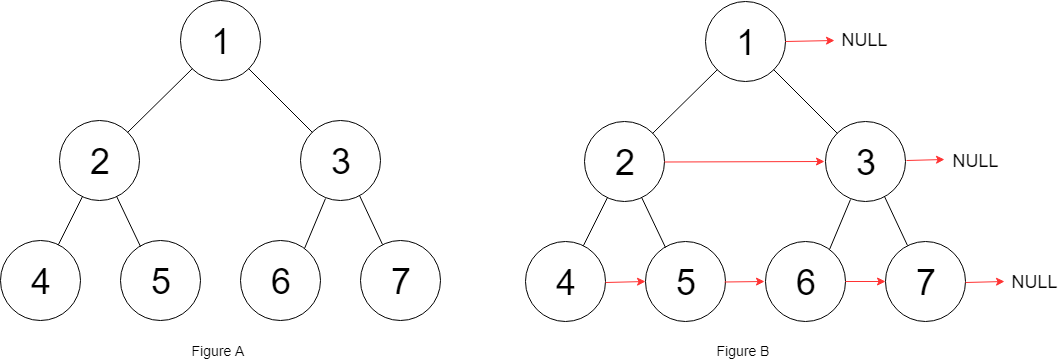

In [21]:

url = 'https://assets.leetcode.com/uploads/2019/02/14/116_sample.png'
Disp.Image(requests.get(url).content, width=600, height=200)

**Total Brute Force Logic** <br>

- Each lvl in BST has 2^(lvl) nodes. So we track nodes in sets of levels. <br>
- Initially 2^0 nodes are taken, then the next 2^1 nodes, then 2^2 nodes and so on<br>
- Once you get all nodes in certain level in list, just add pointers<br>

In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, val: int = 0, left: 'Node' = None, right: 'Node' = None, next: 'Node' = None):
        self.val = val
        self.left = left
        self.right = right
        self.next = next
"""

class Solution:
    def update_links(self, nodes):
        if nodes:
            nodes[-1].next = None
            if len(nodes)==1:
                return
            for i in range(len(nodes)-1):
                nodes[i].next = nodes[i+1]
        
    def level_order_traversal(self, root):
        q = [root]
        cur_level_q = []
        cur = 0
        cur_level = 0
        
        if not root:
            return
        
        while q:
            cur += 1
            if cur > (2**cur_level):
                self.update_links(cur_level_q)
                cur_level += 1
                cur = 1
                # print("HOP: ",[x.val for x in cur_level_q])
                cur_level_q = []
                
            node = q.pop(0)
            cur_level_q.append(node)
            # print(node.val, end=" -> ")
            if node.left:
                q.append(node.left)
            if node.right:
                q.append(node.right)
        
        self.update_links(cur_level_q)
        
    
    def connect(self, root: 'Optional[Node]') -> 'Optional[Node]':
        self.level_order_traversal(root)
        return root
        
        